# Inlämningsuppgift for statistics methods

Authors: Yuna Liu and Kun Han

Date: 2022/1/21

## Uppgifter 1

Här är tanken att du lära dig förstå hur Centrala gränsvärdessatsen fungerar genom att se hur ett histogram av observationer av stickprovsmedelvärden påverkas av hur många observationer som ingår i varje medelvärde. Dessutom behandlas konfidensintervall och styrka hos ett hypotestest.

I Python kan man, t ex med numpy.random.random_integers, generera observationer av en likformigt fördelad diskret slumpvariabel som tar värden 4,5,6,7. För en sådan slumpvariabel, kalla den X, gäller alltså att P(X=4)=P(X=5)=P(X=6)=P(X=7)=1/4. I deluppgifterna 1-7 menas slumpvariabel/slumpvariabler definierade enligt ovan även om det bara står slumpvariabel/slumpvariabler.

1) Vi ska alltså skapa observationer av stickprovsmedelvärden $${\bar x}$$ 
Hur ska du göra/skriva i Python för att få observationer av stickprovsmedelvärden baserade på fem observationer av slumpvariabler? Svara gärna med hjälp av en skärmdump och förklarande text.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as scs
from scipy.stats import norm

In [2]:
# Create a uniformly distributed discrete random variable X of five observations
# which take values 4, 5, 6, 7
# we then calculate the mean X_bar for these five observations and save as x_bar_5

sample_5=np.random.randint(4,8,5)
x_bar_5=sample_5.mean()
sample_5, x_bar_5

(array([7, 5, 6, 4, 5]), 5.4)

**TODO**: random.randint, ja. den ger diskreta likformiga slumptal. random.uniform ger kontinuerliga likformiga och den ska ni använda i deluppgift 2

2) Skapa 1000 standardiserade stickprovsmedelvärden, vart och ett baserat på 2 observationer av slumpvariabler, och gör histogram för de 1000 standardiserade stickprovsmedelvärdena. Upprepa proceduren för stickprovsstorlekarna 10, 20, 30 och 50. 

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


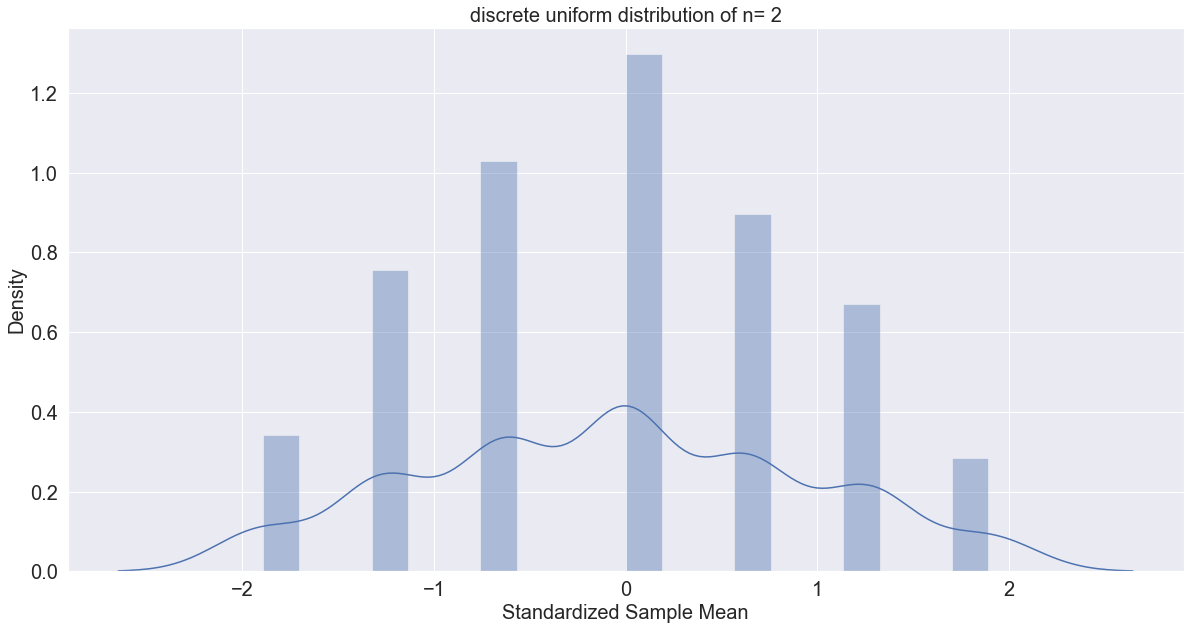

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


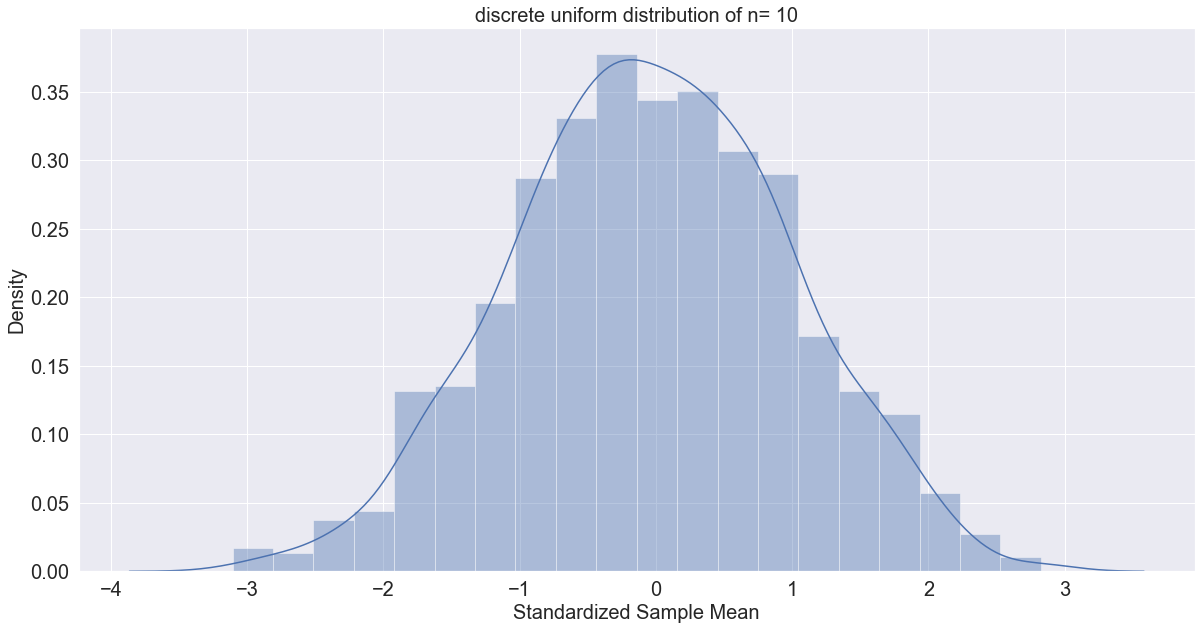

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


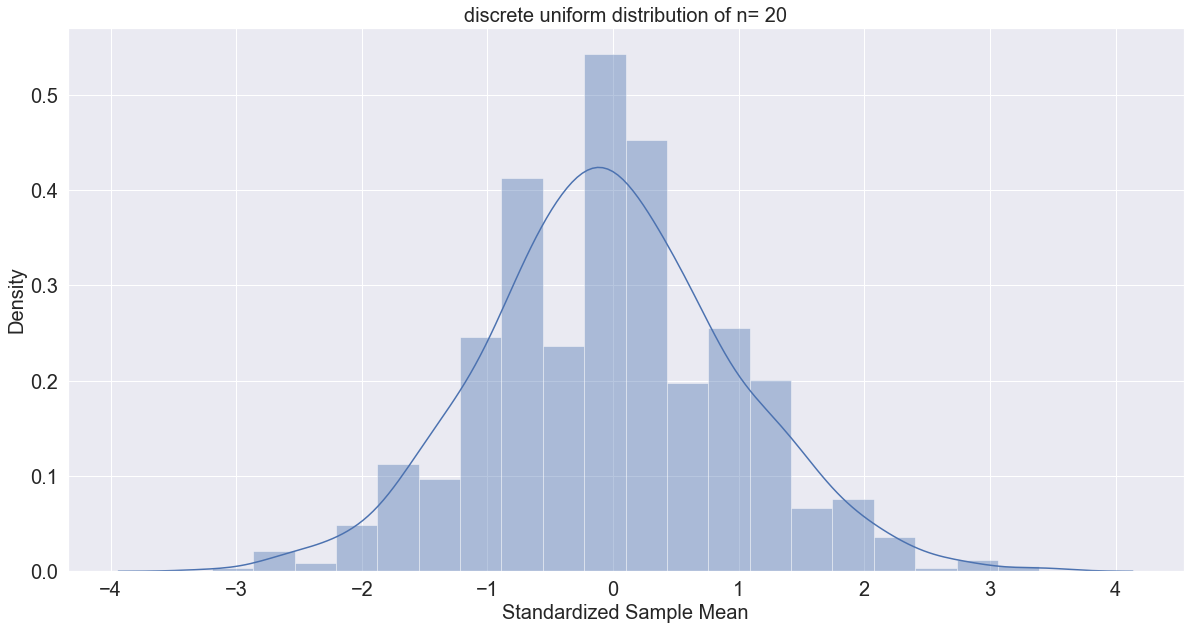

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


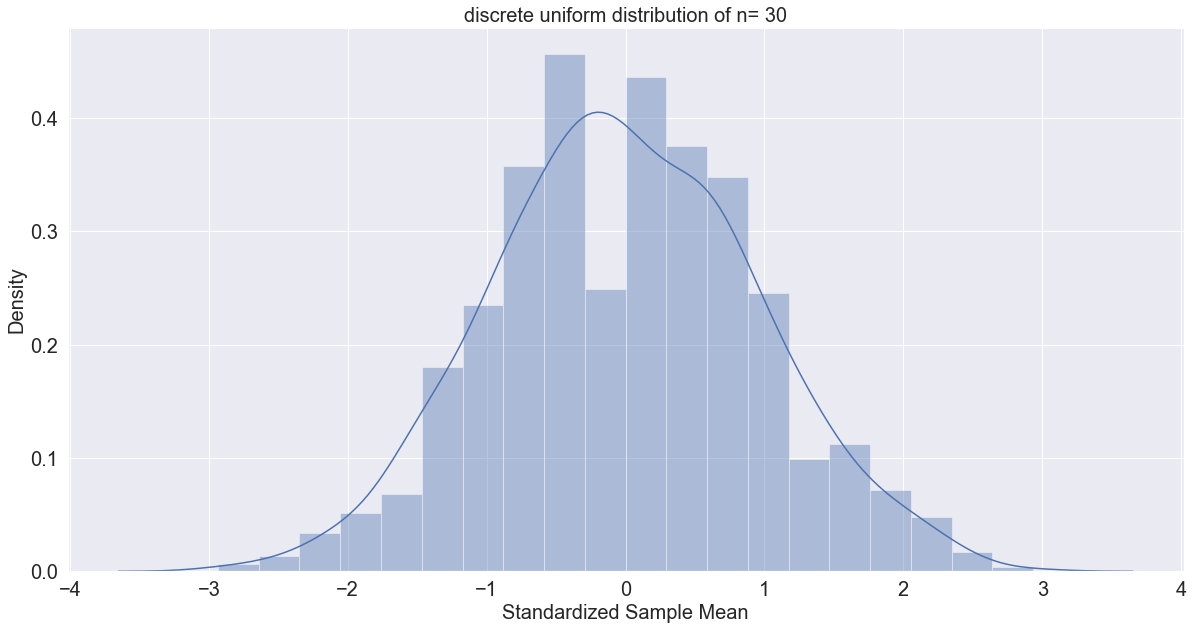

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


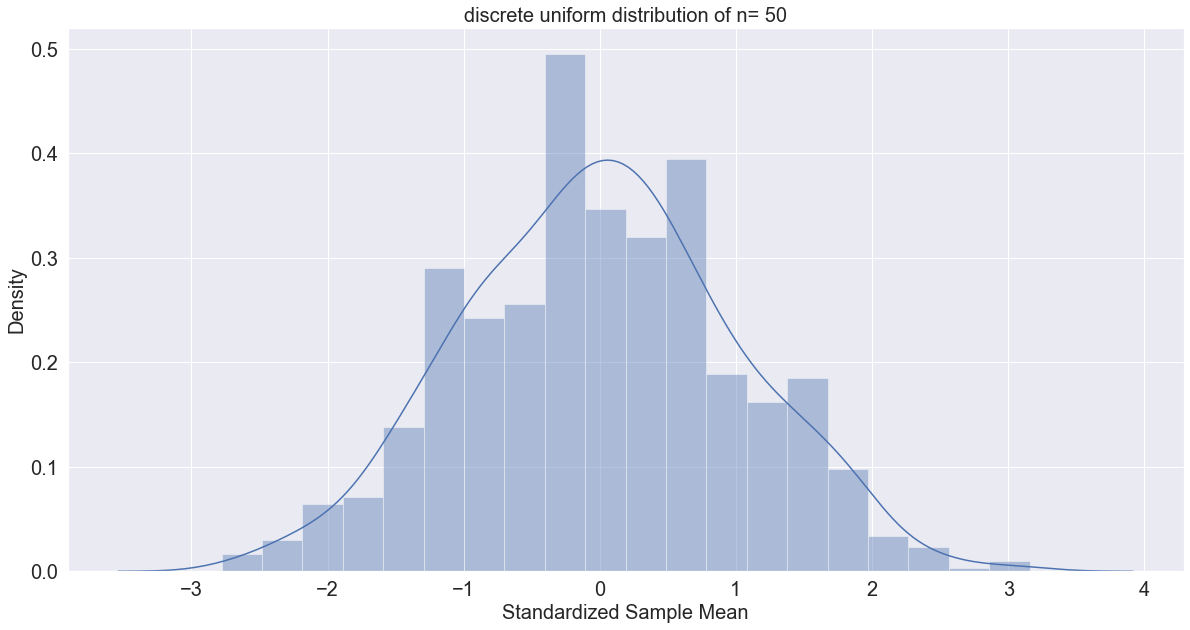

In [3]:
# question 2)

# sample size n is equal to a list
n= [2, 10, 20, 30, 50]

# We first calculate the population mean my
my = 4*(1/4) + 5*(1/4) + 6*(1/4) + 7*(1/4)

# We then calculate the population standard deviation sigma
sigma = np.sqrt((1/4)*(4-my)**2 + (1/4)*(5-my)**2 + (1/4)*(6-my)**2 + (1/4)*(7-my)**2).round(2)

# We create a X variable with n observations in each loop
# We calculate the sample mean for this X variable as x_bar_n in each loop
# Loop for 1000 times, we save x_bar_n to x_bars_n during each loop
# After that, we plot the distribution of x_bars_n

for i in n:
    samples=1000

    x_bars_n=np.zeros(samples)

    for x in range(samples):
        sample_n=np.random.randint(4,8,i)
        x_bar_n=sample_n.mean()
        x_bars_n[x]= (x_bar_n-my)/(sigma/np.sqrt(i))
    
    x_bars_n

    plt.figure(figsize=(20,10))
    sns.distplot(x_bars_n, bins=20)
    plt.title(f'discrete uniform distribution of n= {i}', fontsize=20)
    plt.xlabel('Standardized Sample Mean', fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

3) Hur beräknar du μ_X ̅  i 2)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)

4) Hur beräknar du σ_X ̅  i 2)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)

5) Vad händer med fördelningen för de standardiserade stickprovsmedelvärdena då antalet observationer som stickprovsmedelvärdena baseras på ökar? Finns det något teoretiskt stöd för detta och i så fall vilket? 

From the previous figures, we found that the distribution of the standarized sample mean trends to be normal distribution(informally a " bell curve " with mean equal to 0) as n becomes larger. The underlying theorem is Central Limit Theorem. As n is large, the distribution of the standarized sample mean becomes normal distribution even if the original variable is not normal distribution.

6)  Gör 1000 95%-konfidensintervall för populationsmedelvärdet μ, vart och ett baserat på 50 observationer av slumpvariabler. Hur många av dessa täcker populationsmedelvärdet? Är detta vad du förväntade dig? Motivera? 

**TODO:** Konfidensintervall för medelvärde i en population (känd standardavvikelse):

$${\bar x} + - z(alpha/2)*sigma/sqrt(n)$$

In [4]:
samples=1000
n=50
count = 0

for x in range(samples):
    sample_n=np.random.randint(4,8,n)
    x_bar_n=sample_n.mean()
    #create 95% confidence interval for population mean
    # scs.norm.ppf(.975).round(2) is 1.96
    z_critical_value = scs.norm.ppf(1-.05/2).round(2)
    up_limit = x_bar_n + z_critical_value*sigma/np.sqrt(n)
    down_limit = x_bar_n - z_critical_value*sigma/np.sqrt(n)
    if down_limit < my < up_limit:
        count += 1 
print(f'For {count} of 1000 times, the confidence interval includes the population mean, which is a proportion of {count/samples*100:.2f}%')

For 951 of 1000 times, the confidence interval includes the population mean, which is a proportion of 95.10%


**TODO:** Please add the explanation to this.

Around 95% of times does the population mean locates in the confidence interval. This expectation is approximately the same as the test result.

7) Antag att vi vill göra hypotestest för populationsmedelvärdet med

H_0:μ≤5.1
H_A:μ>5.1

Testet ska utföras på signifikansnivån 0.05 och med stickprovsstorleken 50. Med hjälp av de 1000 raderna och 50 kolonnerna med observerade slumpvariabler vill vi undersöka testets styrka genom att utföra testet 1000 gånger. Vad blir styrkan, dvs hur stor andel av testerna förkastar den falska nollhypotesen? 


Eftersom $$\sigma$$ är känd ska vi använda z-test: $$\frac{{\bar x}-\mu}{\frac{sigma}{\sqrt{n}}}$$

In [5]:
samples=1000
n=50

for x in range(samples):
    sample_n=np.random.randint(4,8,n)
    x_bar_n=sample_n.mean()
    test_fun=(x_bar_n-my)/(sigma/np.sqrt(n))
    p_val=norm.cdf(test_fun)
    p_val

## Uppgifter 2

Syftet med den här uppgiften är att belysa det vanliga misstaget att tro att bara för att man får stora stickprov så blir data normalfördelade. Vad CGS säger är ju att om stickproven blir stora så blir stickprovsmedelvärdena/stickprovsproportionerna normalfördelade! I den här uppgiften kommer du att skapa stickprovsdatadata av olika storlekar. Du ska använda slumptal som är kontinuerligt likformigt fördelade på intervallet [7,11]. Sådana slumptal kan genereras med numpy.random.uniform. Nedan kallar vi dessa bara slumptal.


8)	Generera 200 stickprov av storlek fem och gör ett histogram av alla 1000 observationerna. Tyder histogrammet på att data är normalfördelade?*

In [6]:
#Define an array for N_of_samples samples, each sample size of sample_size
def histogram_continous_uniform(sample_size, N_of_samples):
    samples_n = np.zeros((N_of_samples,sample_size)) 
    #Defining parameters from our population distribution
    lo, hi = 7,11
    #Creating for loop
    for x in range(N_of_samples):
        samples_n[x] = np.random.uniform(lo, hi, sample_size)

    plt.figure(figsize=(20,10))
    sns.distplot(samples_n, bins=20)
    plt.title(f'Histogram of {N_of_samples} samples of continous uniform variable with n= {sample_size} per sample', fontsize=20)
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


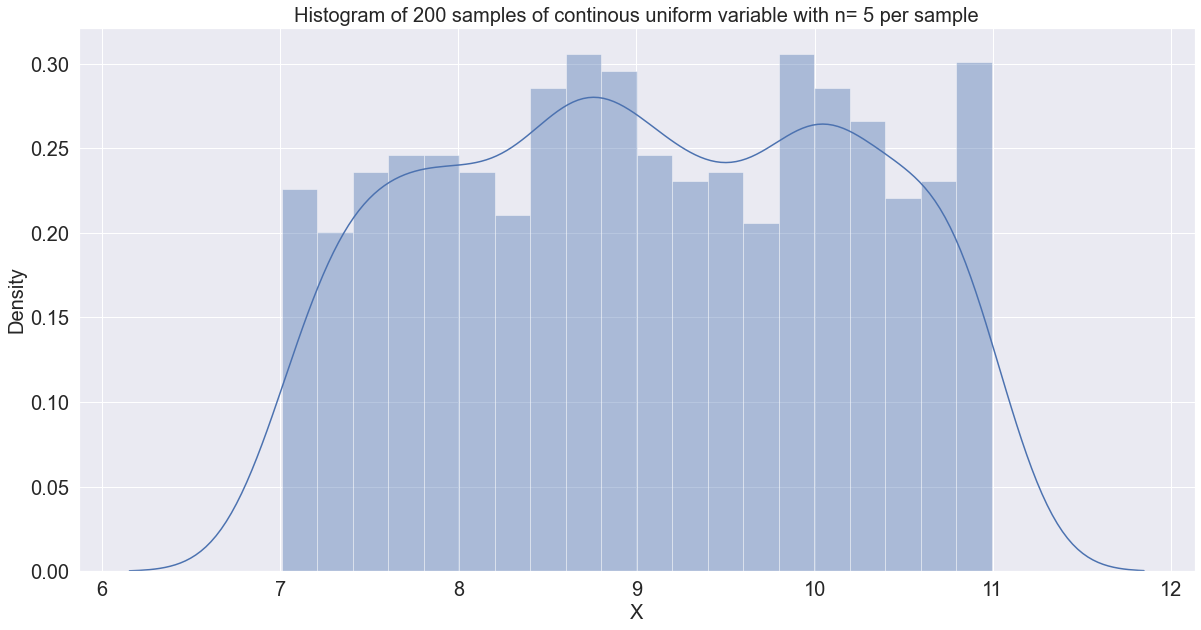

In [7]:
sample_size=5
N_of_samples = 200
histogram_continous_uniform(sample_size, N_of_samples)

The figure shows that these 1000 observations are not normally distributed.

9)	Skapa 200 standardiserade medelvärden vart och ett baserat på stickprov av storlek fem genererade i uppgift 8 och skapa ett histogram av dessa medelvärden. Tyder histogrammet på att medelvärdena är normalfördelade?*

In [8]:
def histogram_continous_uniform_standarized(sample_size, N_of_samples):
    # n is the sample_size, and samples stands for the number of samples
    # Define an array for N_of_samples samples per sample size of sample_size

    samples_n = np.zeros((N_of_samples,sample_size))

    #Defining parameters from our population distribution
    lo, hi = 7,11

    # We calculate the population mean my
    my = (hi+lo)/2

    # We calculate the population standard deviation sigma
    sigma = (hi-lo)/np.sqrt(12).round(2)

    # We create a X variable with n observations in each loop
    # We calculate the sample mean for this X variable as x_bar_n in each loop
    # Loop for number of samples times, we save x_bar_n to x_bars_n during each loop
    # After that, we plot the distribution of x_bars_n

    x_bars_n=np.zeros(N_of_samples)

    for x in range(N_of_samples):
        sample_n=np.random.uniform(lo, hi, sample_size)
        x_bar_n=sample_n.mean()
        x_bars_n[x]= (x_bar_n-my)/(sigma/np.sqrt(sample_size))
    
    x_bars_n

    plt.figure(figsize=(20,10))
    sns.distplot(x_bars_n, bins=20)
    plt.title(f'Histogram of {N_of_samples} samples of continous uniform variable with n= {sample_size} per sample', fontsize=20)
    plt.xlabel('Standardized Sample Mean', fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


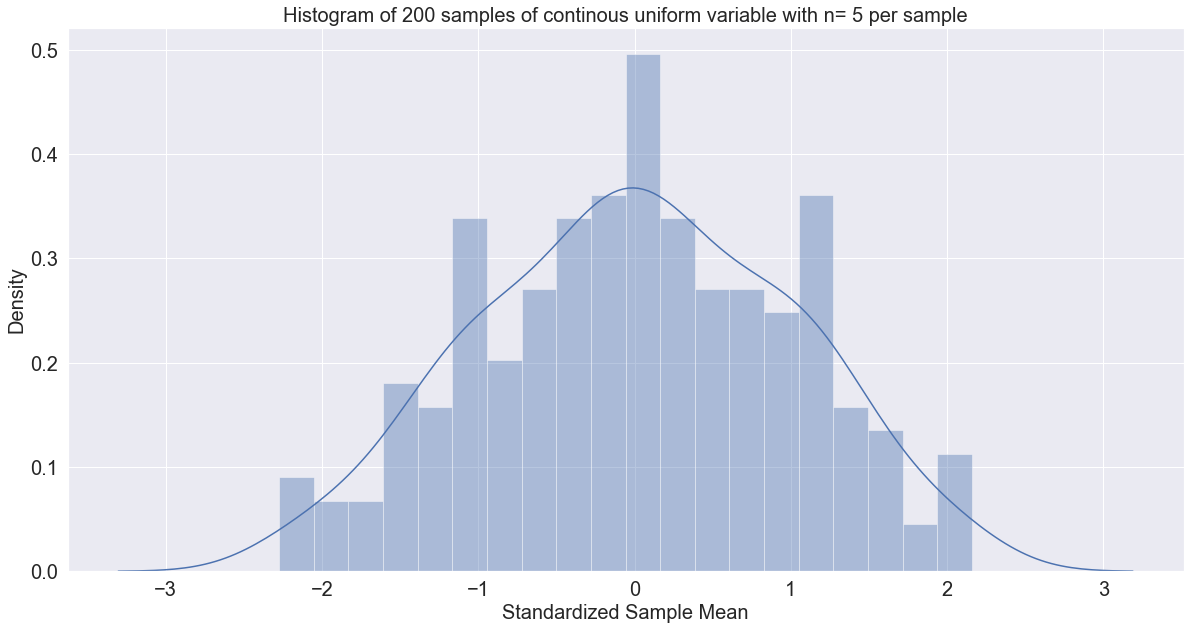

In [9]:
sample_size= 5
N_of_samples = 200
histogram_continous_uniform_standarized(sample_size, N_of_samples)

10) Hur beräknar du μ_X ̅  i 9)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)

11) Hur beräknar du σ_X ̅  i 9)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)

12) Generera 200 stickprov av storlek 20 och gör ett histogram av alla 4000 observationerna. Tyder histogrammet på att data är normalfördelade?*


C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


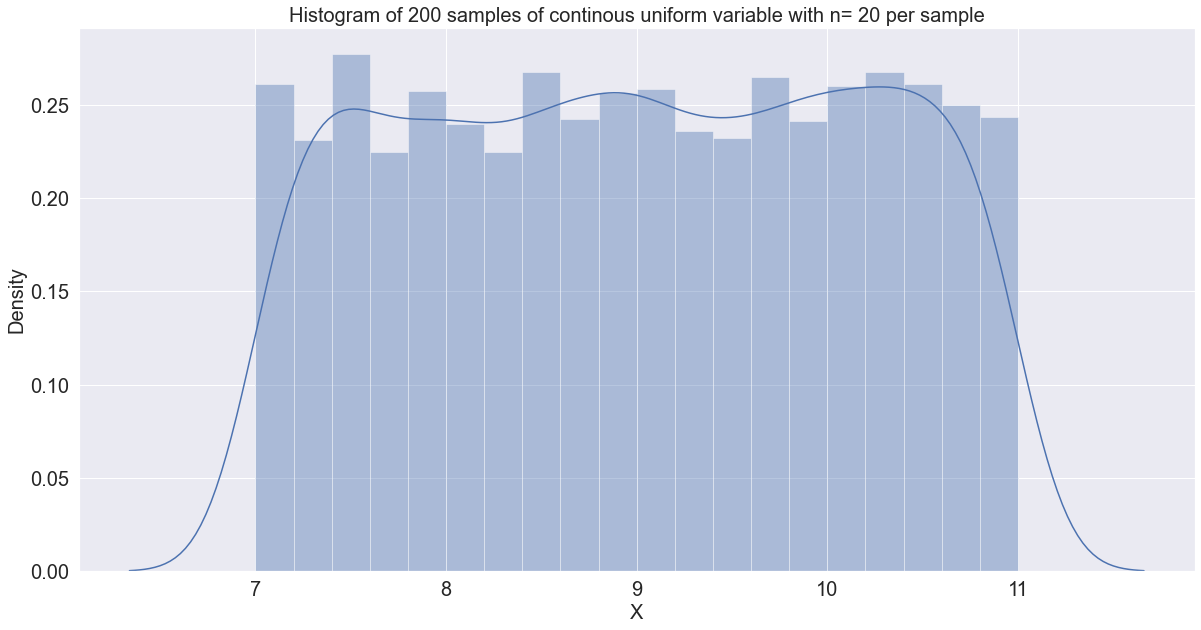

In [10]:
sample_size= 20
N_of_samples = 200
histogram_continous_uniform(sample_size, N_of_samples)

13)	Skapa 200 standardiserade medelvärden vart och ett baserat på stickprov av storlek 20 genererade i uppgift 12 och skapa ett histogram av dessa medelvärden. Tyder histogrammet på att medelvärdena är normalfördelade?*

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


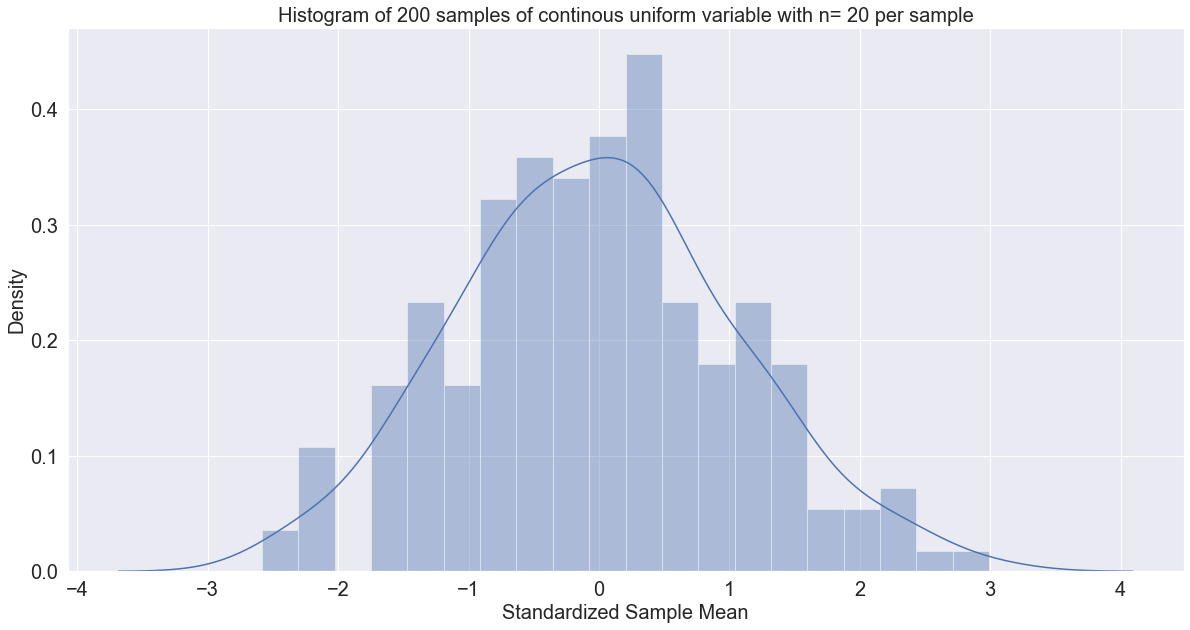

In [11]:
sample_size= 20
N_of_samples = 200
histogram_continous_uniform_standarized(sample_size, N_of_samples)

14)	Generera 200 stickprov av storlek 50 och gör ett histogram av alla 10000 observationerna. Tyder histogrammet på att data är normalfördelade?*

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


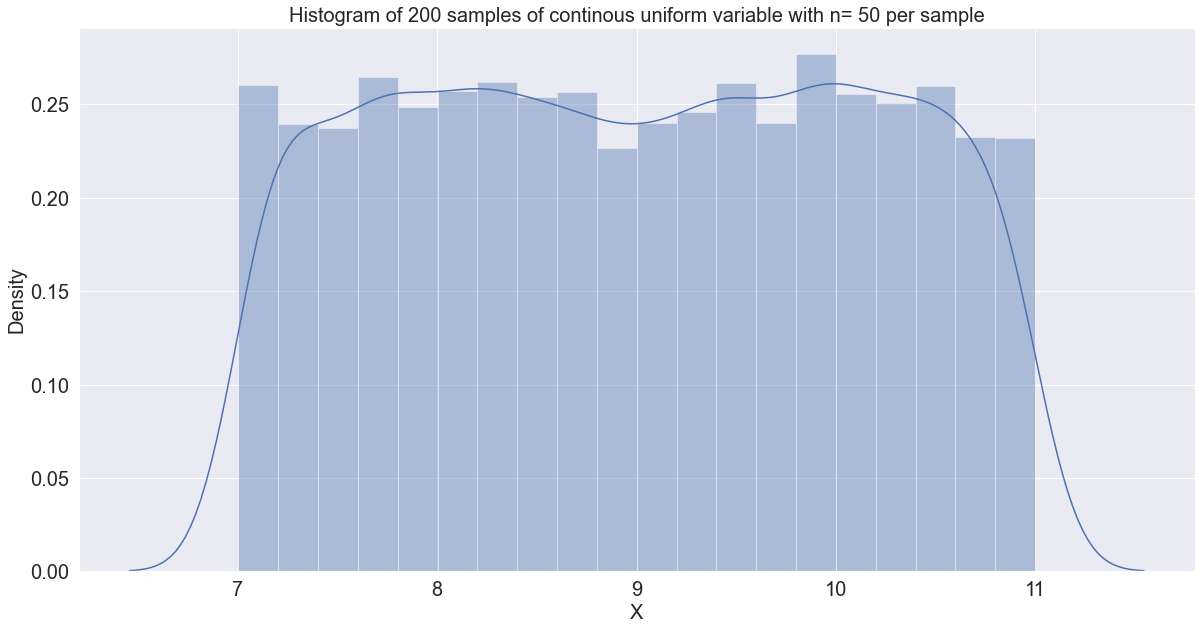

In [12]:
sample_size= 50
N_of_samples = 200
histogram_continous_uniform(sample_size, N_of_samples)

15)	Skapa 200 standardiserade medelvärden vart och ett baserat på stickprov av storlek 50 genererade i uppgift 14 och skapa ett histogram av dessa medelvärden. Tyder histogrammet på att medelvärdena är normalfördelade?*

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


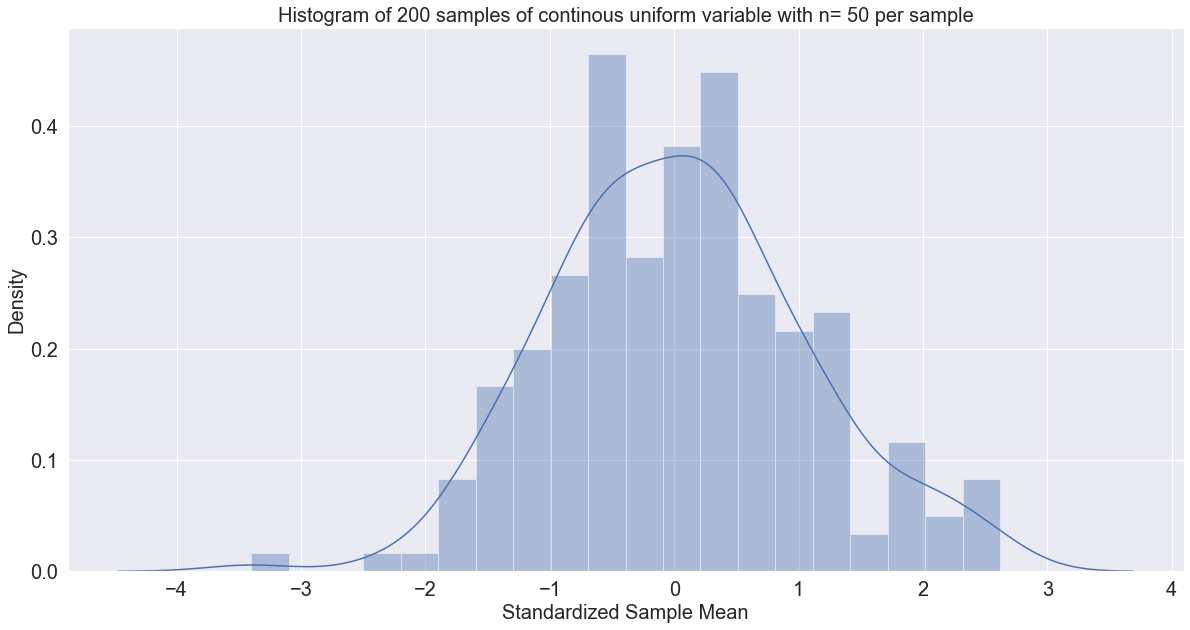

In [13]:
sample_size= 50
N_of_samples = 200
histogram_continous_uniform_standarized(sample_size, N_of_samples)